# Case Study - MAPK
"Signaling switches and bistability arising from multisite phosphorylation in protein kinase cascades", Markevich et al., 2004.

Exercise: See if you can reproduce Figure 3, hysteresis.

1. Create the Tellurium simulation model for Fig. 1. What issues with constructing the model from the paper?
1. Evaluate if can reproduce the results in Fig 3 (below).
1. Explore how might be able to obtain results like Fig. 3.

<img src="figure3.png" width="300">, 

In [1]:
%matplotlib inline
import numpy as np
import model_fitting as mf
import tellurium as te
import matplotlib.pyplot as plt

## Model
Note that the paper does not provide a value for $K_{m5}$. So we need to guess.

In [4]:
model = """
R1: M -> Mp; (k1_cat * MAPKK*M/k_m1)/(1 + M/k_m1 + Mp/k_m2)
R2: Mp -> Mpp; (k2_cat * MAPKK*Mp/k_m2)/(1 + M/k_m1 + Mp/k_m2)
R3: Mpp -> Mp; (k3_cat * MKP*Mpp/k_m3)/(1 + Mpp/k_m3 + Mp/k_m4 + M/k_m5)
R4: Mp -> M; (k4_cat * MKP*Mp/k_m4)/(1 + Mpp/k_m3 + Mp/k_m4 + M/k_m5)


M = 500;
Mp = 0;
Mpp = 0;
k1_cat = 0.01
k2_cat = 15;
k3_cat = 0.084;
k4_cat = 0.06
k_m1 = 50;
k_m2 = 500;
k_m3 = 22;
k_m4 = 18;
k_m5 = 0;  # Not specified in model
MAPKK = 50;
MKP = 100;
"""
rr = te.loada(model)

## Does model produce results similar to paper?
Check that the behavior looks like Figure 3. That is, we get the expected values of Mpp as we vary MAPKK.

In [54]:
def plotParameterDynamics(name, values, others_dict={}):
    for value in values:
        parameters = mf.makeParameters([name], values=[value], maxs=[value] )
        for other_name in others_dict.keys():
            other_value = others_dict[other_name]
            parameters.add(other_name, value=other_value, min=other_value*0.99, max=other_value*1.01)
        data = mf.runSimulation(parameters=parameters, model=model, sim_time=4000, num_points=100)
        plt.plot(data[:,0], data[:,1:])
        plt.legend(['M', 'Mp', 'Mpp'])
        plt.title("%s=%f" % (name, float(value)))
        plt.show()

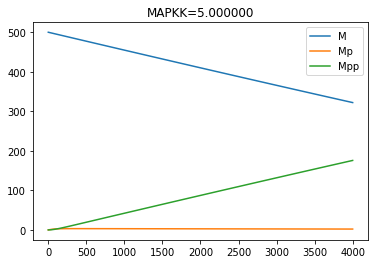

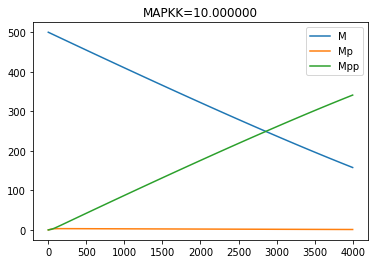

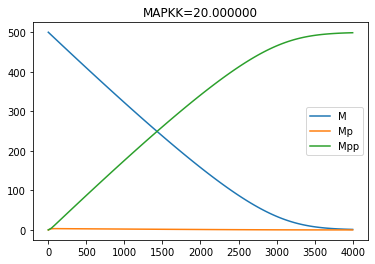

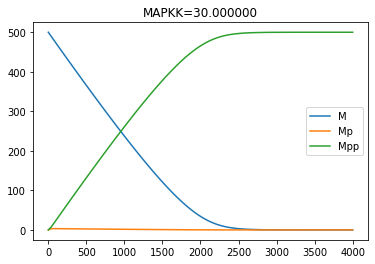

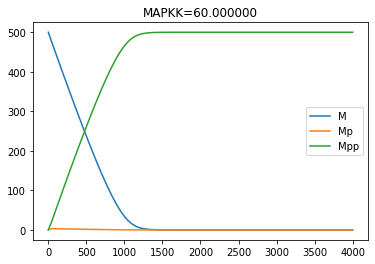

In [50]:
plotParameterDynamics('MAPKK', [5, 10, 20, 30, 60])

# What's Wrong?
1. $K_{m5}$ is unspecified. Maybe, we need the right value?
1. $k^{cat}_2$ is much larger than the other $k^{cat}$. A typo?

### $K_{m5}$

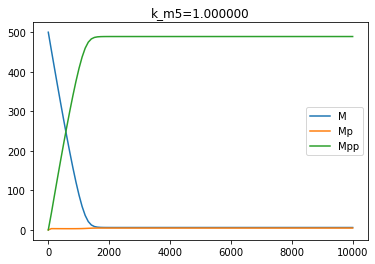

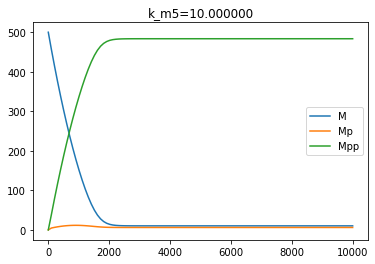

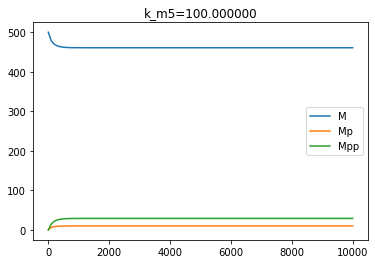

In [36]:
plotParameterDynamics('k_m5', [1, 10, 100])

It's possible that $K_{m5} \approx 10$ might produce interesting dynamics.

### $k^{cat}_2$

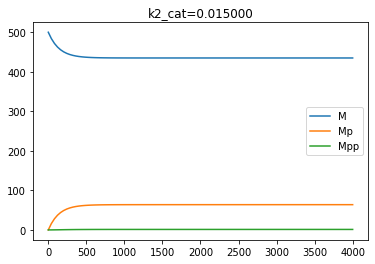

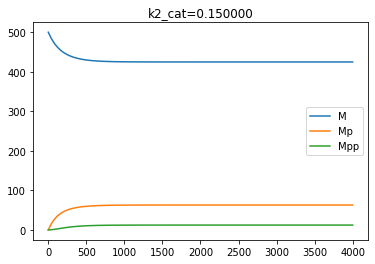

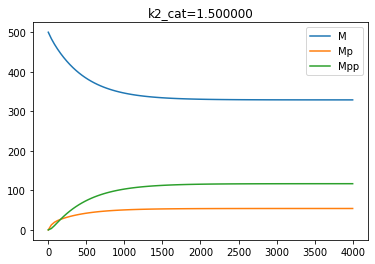

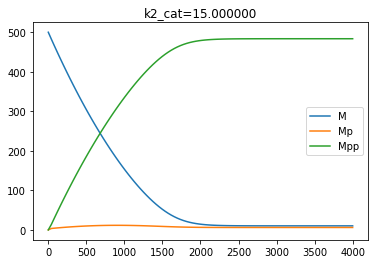

In [62]:
plotParameterDynamics('k2_cat', [0.015, 0.15, 1.5, 15], others_dict={"k_m5": 10})

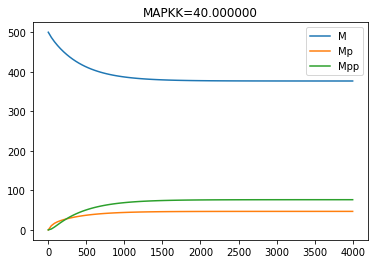

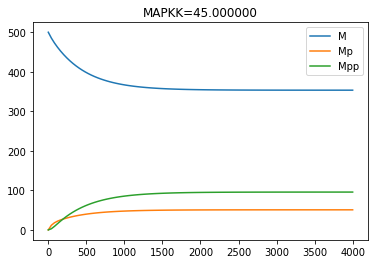

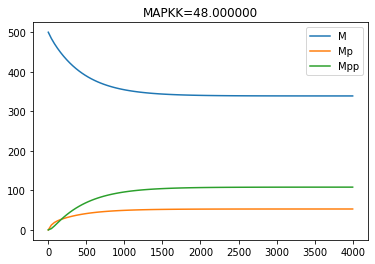

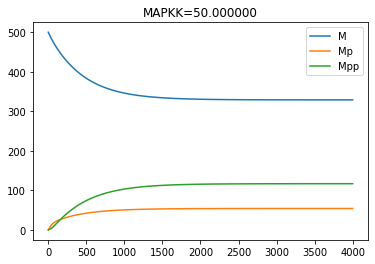

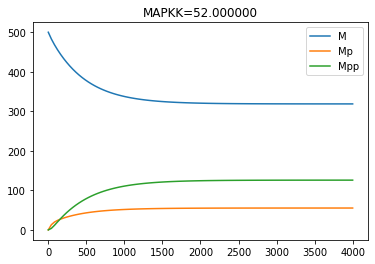

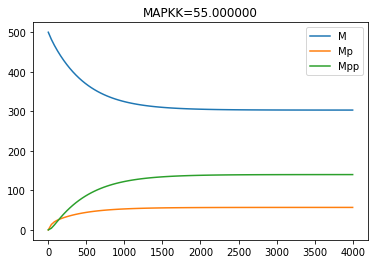

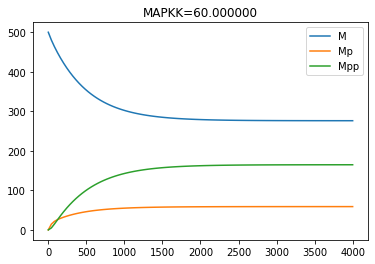

In [65]:
plotParameterDynamics('MAPKK', [40, 45, 48, 50, 52, 55, 60], others_dict={"k_m5": 10, "k2_cat": 1.5})

# Obtaining Stead State Values

In [12]:
# Ideally, we get steady state directly. But this fails. So, may need just to run the simulation long enough.
parameters = mf.makeParameters(['MAPKK'], values=[50] )
road_runner = mf.makeSimulation(parameters=parameters, model=model)
try:
    print(road_runner.getSteadyStateValues())
except Exception as e:
    print(e)



Jacobian matrix singular in NLEQ. Failed to converge to steady state. Check if Jacobian matrix is non-invertible or steady state solution does not exist.
